In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# "6Ps Data.xlsx" dataset

In [2]:
df= pd.read_excel('6Ps Data.xlsx')

### Removing the spaces in the column names

In [3]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
df.columns = cols

In [4]:
cols = df.columns
cols = cols.map(lambda x: x.replace('-', '_'))
df.columns = cols

In [5]:
df.columns

Index(['Data_Source', 'Freq_of_Delivery', 'Region', 'COUNTRY',
       'Category_Group', 'Category', 'Market', 'Sector', 'Category_Gender',
       'Sector/Variance', 'GMI_Level', 'UL_/_Comp', 'Global_Manufacturer',
       'Global_Brand', 'Local_Brand', 'Measure_/_KPI', 'Primary_Key', '6P',
       'Source', 'Supplier', 'Measure_Type', 'Measure_Category', 'Last_12W_2',
       'Last_12W_1', 'L12W_1_Significance', 'Last_12W', 'L12W_Significance',
       'MAT_2', 'MAT_1', 'MAT_1_Significance', 'MAT', 'MAT_Significance'],
      dtype='object')

In [6]:
df.shape

(374303, 32)

In [7]:
df.isna().sum()

Data_Source                 0
Freq_of_Delivery            0
Region                      0
COUNTRY                     0
Category_Group           3680
Category                 3702
Market                   3680
Sector                      0
Category_Gender        262855
Sector/Variance          2130
GMI_Level               54087
UL_/_Comp                   0
Global_Manufacturer         0
Global_Brand              838
Local_Brand                80
Measure_/_KPI               0
Primary_Key                 0
6P                          0
Source                      0
Supplier                  132
Measure_Type           104392
Measure_Category       214818
Last_12W_2                  0
Last_12W_1                  0
L12W_1_Significance     76387
Last_12W                    0
L12W_Significance       77628
MAT_2                       0
MAT_1                       0
MAT_1_Significance     104192
MAT                         0
MAT_Significance        96464
dtype: int64

### Updating null values from "L12W_1_Significance" column:
On analyzing the data I understood that "L12W_1_Significance" will be zero in the following cases
1. If diff between "Last_12W_2" and "Last_12W_1" is less than 2
2. Tf either "Last_12W_2" or "Last_12W_1" will be zero

If "Last_12W_1">"Last_12W_2"+2 then "L12W_1_Significance" will be 1.0 and
If "Last_12W_1"<"Last_12W_2"+2 then "L12W_1_Significance" will be -1.0

The same technique is used to fill the missing values of L12W_Significance, MAT_1_Significance and MAT_Significance also

(-100, 100)

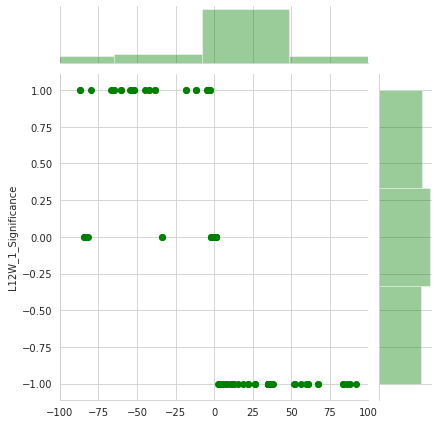

In [8]:
temp=(df['Last_12W_2'][:200]-df['Last_12W_1'][:200])
#ax.bar(df["L12W_1_Significance"], width=0.2, color='b', align='center')
ax=sns.jointplot(temp[:200], df["L12W_1_Significance"][:200], color='g')
#ax.set(xlim=(0,100),ylim=(-1,1))
ax.ax_marg_x.set_xlim(-100, 100)
#ax.bar(df['Last_12W_2'][:200], df["L12W_1_Significance"][:200], width=0.2, color='r', align='center')
#plt.show()

In [9]:
for i in range(len(df)):
    if (np.isnan(df['L12W_1_Significance'][i])):
        if(((np.subtract(df['Last_12W_1'][i],df['Last_12W_2'][i])<=2)and(np.subtract(df['Last_12W_1'][i],df['Last_12W_2'][i])>=-2))or(df['Last_12W_1'][i]==0)or(df['Last_12W_2'][i]==0)):
            df['L12W_1_Significance'][i]=0.0
        elif(df['Last_12W_1'][i]>df['Last_12W_2'][i]+2):
            df['L12W_1_Significance'][i]=1.0
        else:
            df['L12W_1_Significance'][i]=-1.0
    #print(df[i])
            
        

/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

### Updating null values from "L12W_Significance" column:

In [10]:
for i in range(len(df)):
    if (np.isnan(df['L12W_Significance'][i])):
        if(((np.subtract(df['Last_12W_1'][i],df['Last_12W'][i])<=2)and(np.subtract(df['Last_12W_1'][i],df['Last_12W'][i])>=-2))or(df['Last_12W_1'][i]==0)or(df['Last_12W'][i]==0)):
            df['L12W_Significance'][i]=0.0
        elif(df['Last_12W_1'][i]>df['Last_12W'][i]+2):
            df['L12W_Significance'][i]=-1.0
        else:
            df['L12W_Significance'][i]=1.0

/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

### Updating null values from "MAT_1_Significance" column:

In [11]:
for i in range(len(df)):
    if (np.isnan(df['MAT_1_Significance'][i])):
        if(((np.subtract(df['MAT_1'][i],df['MAT_2'][i])<=2)and(np.subtract(df['MAT_1'][i],df['MAT_2'][i])>=-2))or(df['MAT_1'][i]==0)or(df['MAT_1'][i]==0)):
            df['MAT_1_Significance'][i]=0.0
        elif(df['MAT_2'][i]>df['MAT_1'][i]+2):
            df['MAT_1_Significance'][i]=-1.0
        else:
            df['MAT_1_Significance'][i]=1.0

/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

### Updating null values from "MAT_Significance" column:

In [12]:
for i in range(len(df)):
    if (np.isnan(df['MAT_Significance'][i])):
        if(((np.subtract(df['MAT_1'][i],df['MAT'][i])<=2)and(np.subtract(df['MAT_1'][i],df['MAT'][i])>=-2))or(df['MAT_1'][i]==0)or(df['MAT'][i]==0)):
            df['MAT_Significance'][i]=0.0
        elif(df['MAT'][i]>df['MAT_1'][i]+2):
            df['MAT_Significance'][i]=1.0
        else:
            df['MAT_Significance'][i]=-1.0

/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

### Updating null values in Measure_Type:


Finding Unique Values of Measure_Type

In [13]:
column_values = df['Measure_Type'].values.ravel()

unique_values =  pd.unique(column_values)
unique_values

array(['MAT Quarter vs YAG', 'Put People First', 'Unlock the Magic', nan,
       'Build Brand Love', 'Unlock The Magic'], dtype=object)

On analysing the data found that Measure_Type column is dependent on Supplier and Primary Key 

In [ ]:
for i in range(len(df)):
    if (pd.isna(df['Measure_Type'][i])):
        if (((df['Supplier'][i]=='iFinance')or(df['Supplier'][i]=='Teradata'))and(df['Primary_Key'][i]=='Unaided Brand Awareness')):
            df['Measure_Type'][i]='MAT Quarter vs YAG'
        elif (((df['Supplier'][i]=='IPSOS TURKEY')or(df['Supplier'][i]=='Worldpanel')or(df['Supplier'][i]=='Nielsen')or(df['Supplier'][i]=='Numerator'))and(df['Primary_Key'][i]=='Retail Sales Value growth')):
            df['Measure_Type'][i]='Put People First'
        elif ((df['Supplier'][i]=='Millward Brown')and((df['Primary_Key'][i]=='Better Quality Attribute')or((df['Primary_Key'][i]=='Unaided Brand Awareness')and(df['Measure_/_KPI'][i]=='Total Brand Com. Awareness'))or(df['Primary_Key'][i]=='Attractive Pack Attribute'))):
            df['Measure_Type'][i]='Unlock the Magic'
        elif ((df['Supplier'][i]=='Millward Brown')and((df['Primary_Key'][i]=='Brand Equity (MAT data only)')or((df['Primary_Key'][i]=='Unaided Brand Awareness')and(df['Measure_/_KPI'][i]=='Unaided Brand Awareness')))):
            df['Measure_Type'][i]='Build Brand Love'
        elif ((df['Supplier'][i]=='Nielsen')and((df['Primary_Key'][i]=='Average Price Index')or(df['Primary_Key'][i]=='Quality Of Distribution'))):
            df['Measure_Type'][i]='Unlock The Magic'
            #df['Measure_Type'].replace(np.nan, 'Unlock The Magic',inplace=True)
            #print(df['Measure_Type'][i])
        else:
            continue


/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Updating null values in Category Column:

In [16]:
for i in range(len(df)):
    if (pd.isna(df['Category'][i])):
        if(df['Market'][i]=='Deodorants'):
            df['Category'][i]= 'Deodorants & Fragrances'
            print(df["Category"][i])
            

Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances
Deodorants & Fragrances


/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


 Removing Category_Gender, GMI_Level, Measure_Category from the data set as there are found independent columns and have many null values

In [17]:
df=df.drop(["Category_Gender","GMI_Level","Measure_Category"],axis=1)

 Removing the rows still containing null values in the columns which are found independent of other columns.

In [18]:
df= df.dropna()

In [19]:
df.isna().sum()

Data_Source            0
Freq_of_Delivery       0
Region                 0
COUNTRY                0
Category_Group         0
Category               0
Market                 0
Sector                 0
Sector/Variance        0
UL_/_Comp              0
Global_Manufacturer    0
Global_Brand           0
Local_Brand            0
Measure_/_KPI          0
Primary_Key            0
6P                     0
Source                 0
Supplier               0
Measure_Type           0
Last_12W_2             0
Last_12W_1             0
L12W_1_Significance    0
Last_12W               0
L12W_Significance      0
MAT_2                  0
MAT_1                  0
MAT_1_Significance     0
MAT                    0
MAT_Significance       0
dtype: int64

Save the dataset 

In [63]:
df.to_csv('6P_trainData.csv',index=False)

# "Finance.xlsx" dataset

In [21]:
df1=pd.read_excel('Finance.xlsx')

In [22]:
df1.columns

Index(['Company code', 'Org Descripton', 'Sales Organization', 'Org Code',
       'Big C', 'Small C', 'Category', 'Brand', 'Key Customer', 'Geography',
       'Fiscal year/period', '\nGross Sales Value (GSV)', '\nNIV', 'Turnover',
       'Acquisition Turnover', 'Turnover PY', 'Disposal Turnover',
       'Deflated CY Turnover', 'Deflated Acquisition Turnover',
       'Total Supply Chain Cost', 'Gross Profit',
       'Brand and Marketing Investment', 'PBO',
       'Deflated Turnover Hyper adjustment', 'SC Controlled Costs',
       'Underlying Operating Profit', 'Underlying Operating Profit by PCat',
       'Material Costs', 'Production Costs', 'Distribution Costs',
       'SC Overheads & Allocated SCC', 'Supply Chain Total Business Waste'],
      dtype='object')

In [23]:
df1.isna().sum()

Company code                             0
Org Descripton                           0
Sales Organization                       4
Org Code                                 0
Big C                                  506
Small C                                506
Category                                 0
Brand                                    6
Key Customer                           156
Geography                                0
Fiscal year/period                       0
\nGross Sales Value (GSV)                0
\nNIV                                    0
Turnover                               352
Acquisition Turnover                   354
Turnover PY                            352
Disposal Turnover                      354
Deflated CY Turnover                   354
Deflated Acquisition Turnover          354
Total Supply Chain Cost                354
Gross Profit                             6
Brand and Marketing Investment           6
PBO                                      6
Deflated Tu

In [24]:
column_values = df1['Key Customer'].values.ravel()

unique_values =  pd.unique(column_values)
unique_values

array(['OTHERS', 'ICE Cream', 'MAF HYPERMARKET ABCDD PVT LIMITE',
       'METRO HABIB CASH & CARRY ABCDD', 'IMTIAZ PROVISION STORE', nan,
       'General Trade', 'Local modern trade', 'E-Commerce',
       'CANTEEN STORES DEPARTMENT', 'UTILITY STORES CORPORATION',
       'CHASE UP SUPERMARKET', 'SAVE MART PVT LIMITED', 'V SUPERMARKET',
       'PUREIT', 'HoReCa', 'MCDONALDS', 'UNILEVER AQQQER', 'ABRL LIMITED',
       'HABIB GULZAR INTERNATIONAL', 'KFC', 'Food solution direct',
       'CENTRAL SALES DEPOT'], dtype=object)

### Updating null values in "Key Customer Column"

In [25]:
for i in range(len(df1)):
    if(pd.isna(df1["Key Customer"][i])):
        df1["Key Customer"][i]="OTHERS"

/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Removing Big C and Small C columns as there are many null values and found to be independent columns

In [26]:
df1=df1.drop(["Big C","Small C"],axis=1)

Removing rows that still contain null values

In [27]:
df1=df1.dropna()

In [32]:
df1.isna().sum()

Company code                           0
Org Descripton                         0
Sales Organization                     0
Org Code                               0
Category                               0
Brand                                  0
Key Customer                           0
Geography                              0
Fiscal year/period                     0
\nGross Sales Value (GSV)              0
\nNIV                                  0
Turnover                               0
Acquisition Turnover                   0
Turnover PY                            0
Disposal Turnover                      0
Deflated CY Turnover                   0
Deflated Acquisition Turnover          0
Total Supply Chain Cost                0
Gross Profit                           0
Brand and Marketing Investment         0
PBO                                    0
Deflated Turnover Hyper adjustment     0
SC Controlled Costs                    0
Underlying Operating Profit            0
Underlying Opera

save as csv file

In [62]:
df1.to_csv('Finance_trainData.csv',index=False)

# "Nielsen Market Netherlands 2019 MAT Report_modified.xlsx" dataset

In [29]:
df2=pd.read_excel('Nielsen Market Netherlands 2019 MAT Report_modified.xlsx')

In [30]:
df2.shape

(29639, 15)

In [31]:
df2.isna().sum()

Periods                    2
Market Desc               25
CATEGORY                  21
MARKET                    17
COMPANY                   20
GLOBAL BRAND              26
BRAND                      9
SEGMENT                   16
Base Value               174
Promo Base Value         179
Value Sales              159
Base Price per Unit      262
Price pr Unit           1592
Base Price per L/KG      329
Price pr L/KG          11462
dtype: int64

### Updating null values in "Price pr L/KG" column:
On analysing the data fond that "Price pr L/KG" is dependent on Base Price per Unit, Price pr Unit, Base Price per L/KG

In [33]:
for i in range(len(df2)):
    if pd.isna(df2['Price pr L/KG'][i]):
        if pd.notnull(df2['Base Price per L/KG'][i])and pd.notnull(df2['Price pr Unit'][i])and pd.notnull(df2['Base Price per Unit'][i]):
            df2["Price pr L/KG"][i]=df2['Price pr Unit'][i]+(df2['Base Price per L/KG'][i]-df2['Base Price per Unit'][i])

/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
df2=df2.dropna()

In [35]:
df2.isna().sum()

Periods                0
Market Desc            0
CATEGORY               0
MARKET                 0
COMPANY                0
GLOBAL BRAND           0
BRAND                  0
SEGMENT                0
Base Value             0
Promo Base Value       0
Value Sales            0
Base Price per Unit    0
Price pr Unit          0
Base Price per L/KG    0
Price pr L/KG          0
dtype: int64

In [61]:
df2.to_csv('Netherlands_trainData.csv',index=False)

# Nielsen Market UK Deodorants_modified.xlsx

In [64]:
df3=pd.read_excel('Nielsen Market UK Deodorants_modified.xlsx')

In [65]:
df3.shape

(84127, 19)

In [68]:
df3.isna().sum()

PERIOD                  0
CATEGORY GROUP          2
CATEGORY                0
MARKET                  1
COMPANY                53
GLOBAL BRAND            1
BRAND                   7
FORMAT                  8
TYPE                    2
TARGET USER             7
SUBBRAND                0
VARIANT                 1
ITEM                    2
GB BRAND                1
ACTUAL PACK SIZE       29
Value Sales ('000)     18
Volume Sales ('000)    10
Unit Sales ('000)      15
dtype: int64

Removing "Inc Value" as it completely have null Values

In [67]:
df3=df3.drop(["Inc Value"],axis=1)

Removing rows that contain null values as there are only few null values in this data set

In [69]:
df3=df3.dropna()

In [70]:
df3.isna().sum()

PERIOD                 0
CATEGORY GROUP         0
CATEGORY               0
MARKET                 0
COMPANY                0
GLOBAL BRAND           0
BRAND                  0
FORMAT                 0
TYPE                   0
TARGET USER            0
SUBBRAND               0
VARIANT                0
ITEM                   0
GB BRAND               0
ACTUAL PACK SIZE       0
Value Sales ('000)     0
Volume Sales ('000)    0
Unit Sales ('000)      0
dtype: int64

In [71]:
df3.to_csv('UK_trainData.csv',index=False)

# "Penetration Data" dataset

In [51]:
df4=pd.read_excel('Penetration Data.xlsx')

In [52]:
df4.shape

(184115, 34)

In [53]:
df4.isna().sum()

Year                                  0
Period View                           0
Period                                0
Date                                  0
Region                                0
Country                               0
Category Group                        0
Category                              9
Category Segment                      0
Category Detail                       0
UL / Comp                             0
Global Manufacturer                   0
Global Brand                          0
Local Brand                           0
BE Tracker                           62
Metric                                0
Measure Type                          0
Measure Category                  84528
Measure / KPI                         0
Source                                0
Supplier                              0
Absolute Value (Two years ago)        0
Absolute Value (a year ago)           0
Absolute Value                        0
Value Difference                      0


In [54]:
df4=df4.drop(["Quarter - 1","Prior Period Quarter","Latest Quarter","Value Difference QoQ","Hierarchy","Measure Category","Category Variance"],axis=1)

In [56]:
df4=df4.dropna()

In [57]:
df4.isna().sum()

Year                              0
Period View                       0
Period                            0
Date                              0
Region                            0
Country                           0
Category Group                    0
Category                          0
Category Segment                  0
Category Detail                   0
UL / Comp                         0
Global Manufacturer               0
Global Brand                      0
Local Brand                       0
BE Tracker                        0
Metric                            0
Measure Type                      0
Measure / KPI                     0
Source                            0
Supplier                          0
Absolute Value (Two years ago)    0
Absolute Value (a year ago)       0
Absolute Value                    0
Value Difference                  0
Significance                      0
Frequency of Delivery             0
Demographic                       0
dtype: int64

In [59]:
df4.to_csv('Penetration_trainData.csv',index=False)